"""<br>
@Author: Prayag Bhoir<br>
@Date: 01-10-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 01-10-2024<br>
@Title : Python programs on Multiple Linear Regression for  predict number of bikes getting shared based on different parameters  <br>
"""

In [252]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pylab as plt
import math

<h2>Load the dataset </h2>

In [196]:
url = 'https://drive.google.com/uc?id=1ohN2o3zSZ2Xuy4CIdTWN-dTmciUXizst'
df = pd.read_csv(url)
#check the data
df.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [197]:
df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<h2>Check the outliers and correlation</h2>

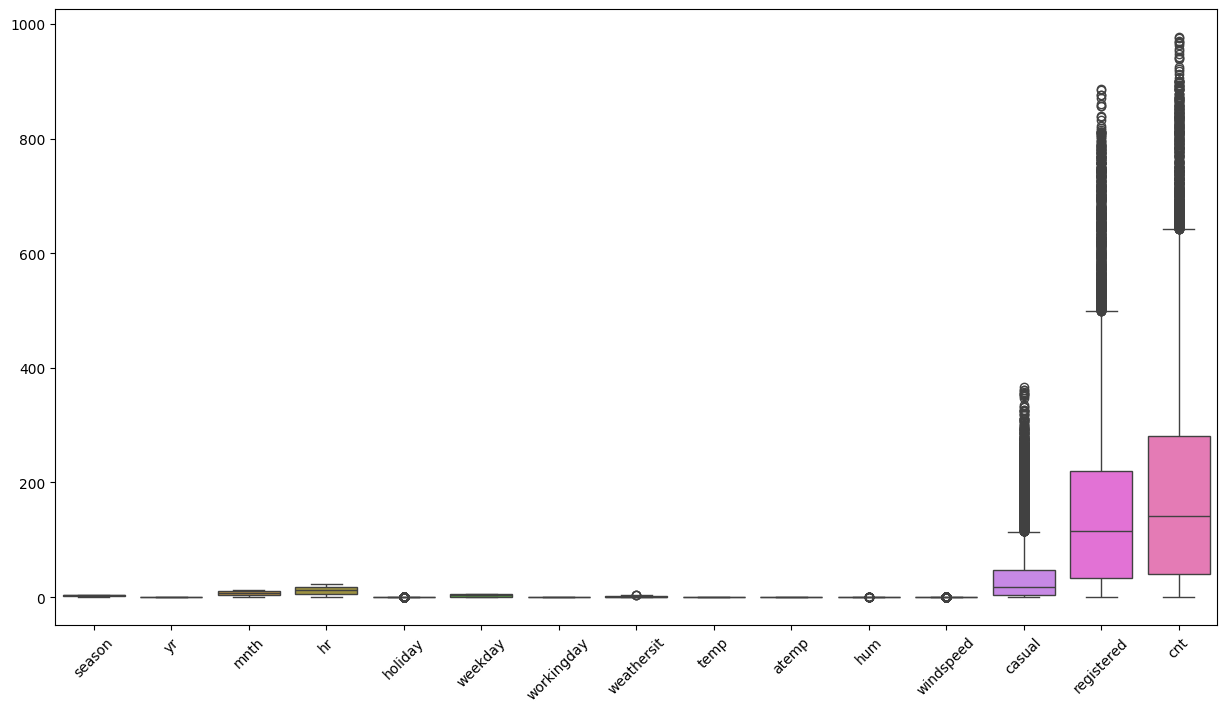

In [198]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop(['instant'], axis=1))
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

<h2>Observations</h2>
	<li>Casual ,registered and cnt has high outliers</li>


<Axes: >

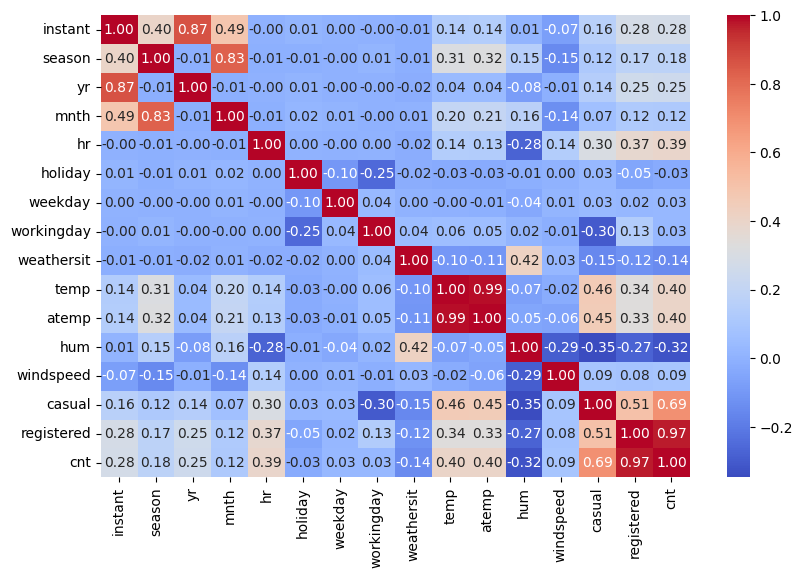

In [199]:
plt.figure(figsize=(9.5,6))
sns.heatmap(df.drop('dteday',axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')

<h2>Observations</h2>
	<li>The orange and redesh shades has high correlation with the cnt(Number of bike shared)</li>


In [200]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to keep only rows within the bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from 'casual' and 'registered' columns
df_cleaned = remove_outliers_iqr(df, 'casual')
df_cleaned = remove_outliers_iqr(df_cleaned, 'registered')
df_cleaned = remove_outliers_iqr(df_cleaned, 'yr')
df_cleaned = remove_outliers_iqr(df_cleaned, 'hr')
df_cleaned = remove_outliers_iqr(df_cleaned, 'temp')
df_cleaned = remove_outliers_iqr(df_cleaned, 'atemp')
df_cleaned = remove_outliers_iqr(df_cleaned, 'cnt')

<h2>Saperate the features</h2>


In [201]:
X = df_cleaned[['yr','hr','temp','atemp','casual','registered']]
y = df_cleaned[['cnt']]
#Check the data
X.head(),y.head()

(   yr  hr  temp   atemp  casual  registered
 0   0   0  0.24  0.2879       3          13
 1   0   1  0.22  0.2727       8          32
 2   0   2  0.22  0.2727       5          27
 3   0   3  0.24  0.2879       3          10
 4   0   4  0.24  0.2879       0           1,
    cnt
 0   16
 1   40
 2   32
 3   13
 4    1)

<h2>Scale the X features</h2>

In [202]:
scaler_x = StandardScaler()

In [203]:
X = scaler_x.fit_transform(X)

<h2>Split the dataset into training and testing</h2>


In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
display(X_test)
display(y_test)

array([[ 1.05295616,  1.51728883, -1.14518017, -1.09156047, -0.73268717,
        -0.61044137],
       [-0.94970716,  1.0980676 , -0.09268697, -0.02517061, -0.35026769,
         1.4161657 ],
       [-0.94970716, -0.01985568,  0.22306099,  0.24172014,  1.25589414,
        -0.26302302],
       ...,
       [ 1.05295616,  1.23780801, -0.72418289, -0.91382883, -0.65620327,
         0.3449591 ],
       [ 1.05295616,  0.39936555,  1.48605283,  1.21953746,  3.32095935,
         0.72132899],
       [ 1.05295616,  1.23780801, -0.40843493, -0.29147479, -0.31202574,
         1.02049479]])

,cnt
8834,58
7372,278
3085,146
13588,342
13133,210
...,...
10151,76
16329,46
9286,159
14241,302


<h2>Build the model</h2>

In [206]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h2>Make prediction on test data.</h2>

In [207]:
y_pred = model.predict(X_test)

<h2>Accuracy matrics</h2>

In [208]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred)) # High mse cause we not scale.
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 7.087971820550734e-27
R² Score: 1.0


<h2>Observations</h2>
<li>This model is overfitted</li>


<h2>Visualize the model</h2>

C:\Users\bhoir\AppData\Local\Temp\ipykernel_19756\3938905153.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


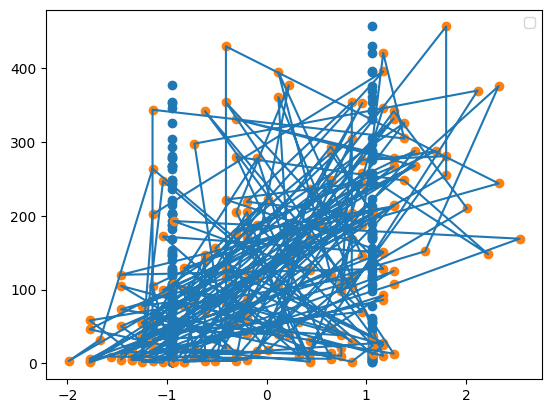

In [251]:
# Take 200 sample from the test 
plt.scatter(x=X_test.iloc[:,0].head(200),y=y_test['cnt'].head(200))
plt.scatter(x=X_test.iloc[:,2].head(200),y=y_test['cnt'].head(200))
plt.plot(X_test.iloc[:,2].head(200),y_pred[:200])
plt.legend()
plt.show()


In [254]:
math.ceil(model.predict([[1.052956	,1.517289	,-1.145180,	-1.091560,	-0.732687,	-0.610441]]))

C:\Users\bhoir\AppData\Local\Temp\ipykernel_19756\2355687329.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  math.ceil(model.predict([[1.052956	,1.517289	,-1.145180,	-1.091560,	-0.732687,	-0.610441]]))


59